In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

barentsburg sj
perth au
port elizabeth za
faanui pf
louisbourg ca
mahebourg mu
natitingou bj
hobart au
hermanus za
kapaa us
castro cl
reconquista ar
cherskiy ru
cape town za
georgetown sh
ushuaia ar
jamestown sh
nouadhibou mr
bermeo es
chuy uy
barsovo ru
puerto ayora ec
provideniya ru
mataura pf
raiganj in
samusu ws
warqla dz
pevek ru
hilo us
novyy urengoy ru
kamenskoye ru
cortez us
aberlour gb
esperance au
hervey bay au
bilibino ru
east london za
mataura pf
poum nc
punta arenas cl
lorengau pg
savannah bight hn
korla cn
berlevag no
kapaa us
lethem gy
kamenka ru
vaini to
tocopilla cl
hambantota lk
mataura pf
burnie au
jamestown sh
kapaa us
barentsburg sj
butaritari ki
san policarpo ph
ancud cl
busselton au
cape town za
sumbe ao
tasiilaq gl
victoria sc
busselton au
saint-philippe re
cherskiy ru
taolanaro mg
chermoz ru
rawson ar
derzhavinsk kz
ruston us
hamilton bm
thayetmyo mm
port alfred za
dikson ru
rikitea pf
mataura pf
namatanai pg
taolanaro mg
fratautii vechi ro
qaanaaq gl
georgetow

saint-philippe re
attawapiskat ca
barentsburg sj
atambua id
albany au
yellowknife ca
edd er
rikitea pf
frontera mx
nikolskoye ru
kanashevo ru
stornoway gb
evensk ru
arcata us
albany au
meulaboh id
kapaa us
kodiak us
kodiak us
busselton au
san juan ar
ushuaia ar
vaini to
albany au
grand river south east mu
hermanus za
talawdi sd
khonuu ru
georgetown sh
coihaique cl
faya td
avarua ck
busselton au
atuona pf
maturin ve
sentyabrskiy ru
kavaratti in
punta arenas cl
saskylakh ru
sao filipe cv
hermanus za
baoding cn
tasiilaq gl
sola vu
belushya guba ru
luanda ao
severo-kurilsk ru
shimsk ru
maxixe mz
mar del plata ar
mar del plata ar
mataura pf
rikitea pf
rikitea pf
artyom az
qaqortoq gl
avarua ck
sironko ug
new norfolk au
iqaluit ca
bathsheba bb
naze jp
marck fr
aranos na
tasiilaq gl
portland au
roald no
busselton au
dukuhturi id
rikitea pf
busselton au
new norfolk au
tapiramuta br
kavieng pg
sao miguel do oeste br
torbay ca
punta arenas cl
castro cl
san carlos de bariloche ar
den helder nl
ba

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


618

In [7]:
cities

['barentsburg',
 'perth',
 'port elizabeth',
 'faanui',
 'louisbourg',
 'mahebourg',
 'natitingou',
 'hobart',
 'hermanus',
 'kapaa',
 'castro',
 'reconquista',
 'cherskiy',
 'cape town',
 'georgetown',
 'ushuaia',
 'jamestown',
 'nouadhibou',
 'bermeo',
 'chuy',
 'barsovo',
 'puerto ayora',
 'provideniya',
 'mataura',
 'raiganj',
 'samusu',
 'warqla',
 'pevek',
 'hilo',
 'novyy urengoy',
 'kamenskoye',
 'cortez',
 'aberlour',
 'esperance',
 'hervey bay',
 'bilibino',
 'east london',
 'poum',
 'punta arenas',
 'lorengau',
 'savannah bight',
 'korla',
 'berlevag',
 'lethem',
 'kamenka',
 'vaini',
 'tocopilla',
 'hambantota',
 'burnie',
 'butaritari',
 'san policarpo',
 'ancud',
 'busselton',
 'sumbe',
 'tasiilaq',
 'victoria',
 'saint-philippe',
 'taolanaro',
 'chermoz',
 'rawson',
 'derzhavinsk',
 'ruston',
 'hamilton',
 'thayetmyo',
 'port alfred',
 'dikson',
 'rikitea',
 'namatanai',
 'fratautii vechi',
 'qaanaaq',
 'malinalco',
 'illoqqortoormiut',
 'thompson',
 'sol-iletsk',
 'bona

# -----------------------------------------------

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=162e9b5a255c55087c26e9478448b887


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 2 of Set 1 | perth
Processing Record 3 of Set 1 | port elizabeth
Processing Record 4 of Set 1 | faanui
Processing Record 5 of Set 1 | louisbourg
City not found. Skipping...
Processing Record 6 of Set 1 | mahebourg
Processing Record 7 of Set 1 | natitingou
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | castro
Processing Record 12 of Set 1 | reconquista
Processing Record 13 of Set 1 | cherskiy
Processing Record 14 of Set 1 | cape town
Processing Record 15 of Set 1 | georgetown
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | nouadhibou
Processing Record 19 of Set 1 | bermeo
Processing Record 20 of Set 1 | chuy
Processing Record 21 of Set 1 | barsovo
Processing Record 22 of Set 1

Processing Record 37 of Set 4 | lahat
Processing Record 38 of Set 4 | huarmey
Processing Record 39 of Set 4 | chulman
Processing Record 40 of Set 4 | talnakh
Processing Record 41 of Set 4 | merauke
Processing Record 42 of Set 4 | boden
Processing Record 43 of Set 4 | muros
Processing Record 44 of Set 4 | chapais
Processing Record 45 of Set 4 | gunnedah
Processing Record 46 of Set 4 | asyut
Processing Record 47 of Set 4 | vestmannaeyjar
Processing Record 48 of Set 4 | labytnangi
Processing Record 49 of Set 4 | florianopolis
Processing Record 50 of Set 4 | kenora
Processing Record 1 of Set 5 | kodiak
Processing Record 2 of Set 5 | tomigusuku
Processing Record 3 of Set 5 | asosa
Processing Record 4 of Set 5 | broome
Processing Record 5 of Set 5 | college
Processing Record 6 of Set 5 | fortuna
Processing Record 7 of Set 5 | la palma
Processing Record 8 of Set 5 | bargal
City not found. Skipping...
Processing Record 9 of Set 5 | bathsheba
Processing Record 10 of Set 5 | attawapiskat
City no

Processing Record 28 of Set 8 | bagdarin
Processing Record 29 of Set 8 | voznesenskoye
Processing Record 30 of Set 8 | kalat
Processing Record 31 of Set 8 | edd
Processing Record 32 of Set 8 | frontera
Processing Record 33 of Set 8 | kanashevo
Processing Record 34 of Set 8 | stornoway
Processing Record 35 of Set 8 | evensk
Processing Record 36 of Set 8 | arcata
Processing Record 37 of Set 8 | meulaboh
Processing Record 38 of Set 8 | san juan
Processing Record 39 of Set 8 | talawdi
City not found. Skipping...
Processing Record 40 of Set 8 | maturin
Processing Record 41 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 42 of Set 8 | sao filipe
Processing Record 43 of Set 8 | baoding
Processing Record 44 of Set 8 | sola
Processing Record 45 of Set 8 | shimsk
Processing Record 46 of Set 8 | maxixe
Processing Record 47 of Set 8 | artyom
Processing Record 48 of Set 8 | qaqortoq
Processing Record 49 of Set 8 | sironko
Processing Record 50 of Set 8 | iqaluit
Processing Reco

Processing Record 16 of Set 12 | huntsville
Processing Record 17 of Set 12 | rabo de peixe
Processing Record 18 of Set 12 | ayia galini
Processing Record 19 of Set 12 | ca mau
Processing Record 20 of Set 12 | oranjestad
Processing Record 21 of Set 12 | khorinsk
Processing Record 22 of Set 12 | cruz das almas
Processing Record 23 of Set 12 | key largo
Processing Record 24 of Set 12 | ahipara
Processing Record 25 of Set 12 | gamba
Processing Record 26 of Set 12 | tulsipur
Processing Record 27 of Set 12 | kingsville
Processing Record 28 of Set 12 | namibe
Processing Record 29 of Set 12 | makiwalo
Processing Record 30 of Set 12 | kismayo
Processing Record 31 of Set 12 | flinders
Processing Record 32 of Set 12 | guerrero negro
Processing Record 33 of Set 12 | orsha
Processing Record 34 of Set 12 | asau
Processing Record 35 of Set 12 | panaba
Processing Record 36 of Set 12 | quetigny
Processing Record 37 of Set 12 | seybaplaya
Processing Record 38 of Set 12 | bentiu
Processing Record 39 of S

# -----------Create a DataFrame of City Weather Data

In [10]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Perth,-31.9333,115.8333,94.66,28,0,16.11,AU,2022-03-07 08:19:24
1,Port Elizabeth,-33.9180,25.5701,81.10,61,0,16.11,ZA,2022-03-07 08:20:38
2,Faanui,-16.4833,-151.7500,81.77,73,79,13.87,PF,2022-03-07 08:20:39
3,Mahebourg,-20.4081,57.7000,86.29,70,75,16.11,MU,2022-03-07 08:20:39
4,Natitingou,10.3042,1.3796,84.63,49,22,2.59,BJ,2022-03-07 08:20:40
5,Hobart,-42.8794,147.3294,66.27,61,0,8.05,AU,2022-03-07 08:20:17
6,Hermanus,-34.4187,19.2345,74.89,82,100,10.71,ZA,2022-03-07 08:20:40
7,Kapaa,22.0752,-159.3190,69.78,70,20,6.91,US,2022-03-07 08:20:41
8,Castro,-24.7911,-50.0119,62.69,90,30,1.54,BR,2022-03-07 08:20:41
9,Reconquista,-29.1500,-59.6500,76.32,76,14,7.81,AR,2022-03-07 08:20:12


In [11]:
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']

In [12]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Perth,AU,2022-03-07 08:19:24,-31.9333,115.8333,94.66,28,0,16.11
1,Port Elizabeth,ZA,2022-03-07 08:20:38,-33.9180,25.5701,81.10,61,0,16.11
2,Faanui,PF,2022-03-07 08:20:39,-16.4833,-151.7500,81.77,73,79,13.87
3,Mahebourg,MU,2022-03-07 08:20:39,-20.4081,57.7000,86.29,70,75,16.11
4,Natitingou,BJ,2022-03-07 08:20:40,10.3042,1.3796,84.63,49,22,2.59
...,...,...,...,...,...,...,...,...,...
565,Lata,PT,2022-03-07 08:36:47,40.1629,-8.3327,46.72,53,0,2.64
566,Laredo,US,2022-03-07 08:34:01,27.5064,-99.5075,70.84,88,75,9.22
567,Melo,UY,2022-03-07 08:36:47,-32.3667,-54.1833,69.46,97,86,5.82
568,Mulchen,CL,2022-03-07 08:36:48,-37.7167,-72.2333,51.30,98,71,1.57


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# ------Plot Latitude vs. Temperature

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

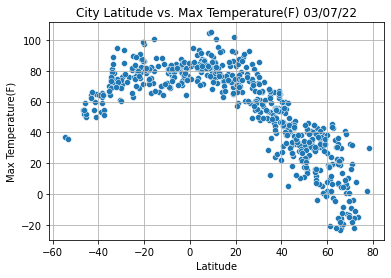

In [15]:
import seaborn as sns
sns.scatterplot(x=lats,y=max_temps)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(F)')
plt.title(f"City Latitude vs. Max Temperature(F) "+ time.strftime("%x"))
plt.grid(True)

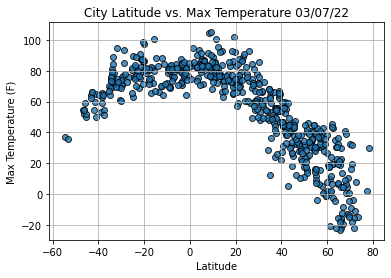

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

# ---------Plot Latitude vs. Humidity

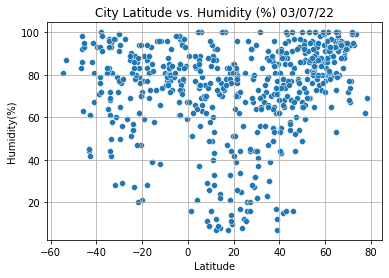

In [17]:
sns.scatterplot(x=lats, y=humidity)
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title(f"City Latitude vs. Humidity (%) "+ time.strftime("%x"))
plt.grid(True)

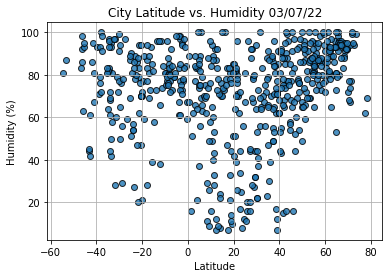

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

# -----------Plot Latitude vs. Cloudiness-----

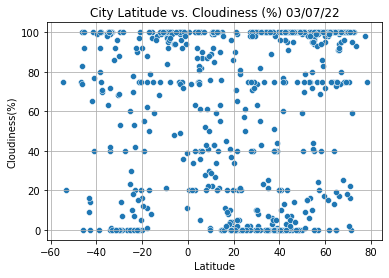

In [19]:
sns.scatterplot(x=lats, y=cloudiness)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.grid(True)

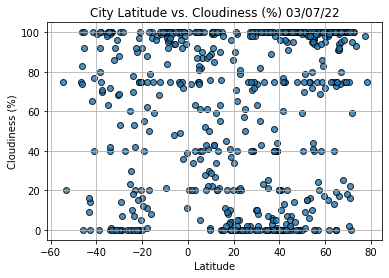

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

# ----------Plot Latitude vs. Wind Speed------

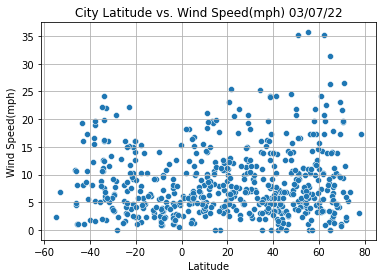

In [21]:
sns.scatterplot(x=lats, y=wind_speed)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.title(f"City Latitude vs. Wind Speed(mph) "+ time.strftime("%x"))
plt.grid(True)

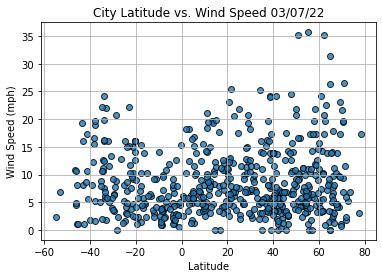

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Perth,AU,2022-03-07 08:19:24,-31.9333,115.8333,94.66,28,0,16.11
1,Port Elizabeth,ZA,2022-03-07 08:20:38,-33.9180,25.5701,81.10,61,0,16.11
2,Faanui,PF,2022-03-07 08:20:39,-16.4833,-151.7500,81.77,73,79,13.87
3,Mahebourg,MU,2022-03-07 08:20:39,-20.4081,57.7000,86.29,70,75,16.11
4,Natitingou,BJ,2022-03-07 08:20:40,10.3042,1.3796,84.63,49,22,2.59


In [25]:
lat_maxtemp=city_data_df[['Lat','Max Temp']]
lat_maxtemp

,Lat,Max Temp
0,-31.9333,94.66
1,-33.9180,81.10
2,-16.4833,81.77
3,-20.4081,86.29
4,10.3042,84.63
...,...,...
565,40.1629,46.72
566,27.5064,70.84
567,-32.3667,69.46
568,-37.7167,51.30


# ----------------------------

In [27]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
4,Natitingou,BJ,2022-03-07 08:20:40,10.3042,1.3796,84.63,49,22,2.59
7,Kapaa,US,2022-03-07 08:20:41,22.0752,-159.3190,69.78,70,20,6.91
10,Cherskiy,RU,2022-03-07 08:20:42,68.7500,161.3000,-12.64,91,100,4.16
12,Georgetown,MY,2022-03-07 08:20:41,5.4112,100.3354,87.73,89,40,11.50
14,Jamestown,US,2022-03-07 08:20:43,42.0970,-79.2353,38.30,68,75,0.00


In [28]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [34]:
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
4,Natitingou,BJ,2022-03-07 08:20:40,10.3042,1.3796,84.63,49,22,2.59
7,Kapaa,US,2022-03-07 08:20:41,22.0752,-159.3190,69.78,70,20,6.91
10,Cherskiy,RU,2022-03-07 08:20:42,68.7500,161.3000,-12.64,91,100,4.16
12,Georgetown,MY,2022-03-07 08:20:41,5.4112,100.3354,87.73,89,40,11.50
14,Jamestown,US,2022-03-07 08:20:43,42.0970,-79.2353,38.30,68,75,0.00


LinregressResult(slope=-1.311004612805194, intercept=97.65547038001442, rvalue=-0.8948904234591156, pvalue=3.1180133313257065e-142, stderr=0.03269019846403658, intercept_stderr=1.419499330177298)

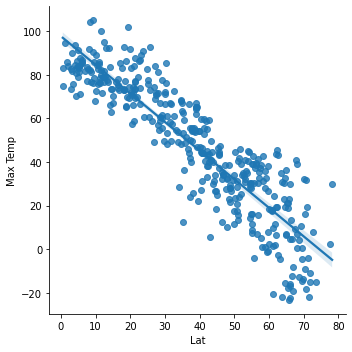

In [38]:
import seaborn as sns
sns.lmplot(x="Lat",y="Max Temp", data=northern_hemi_df, fit_reg=True)
linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])


LinregressResult(slope=0.4588042708903825, intercept=84.6931020845989, rvalue=0.5752177073775316, pvalue=3.4946113379466033e-16, stderr=0.050640111822402835, intercept_stderr=1.306781546923404)

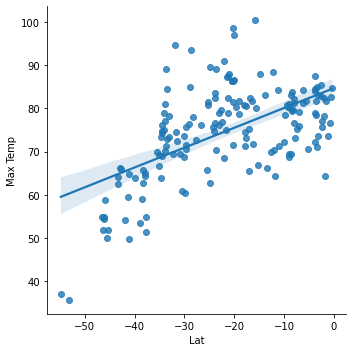

In [30]:
sns.lmplot(x="Lat",y="Max Temp", data=southern_hemi_df, fit_reg=True)
linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

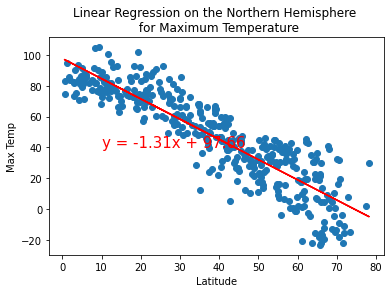

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))


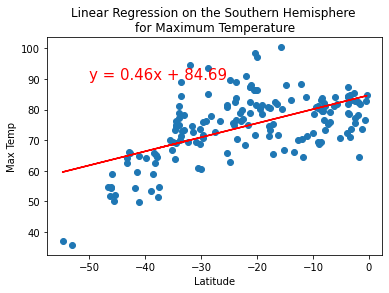

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,90))

# ----Correlation Between Latitude and Percent Humidity---

LinregressResult(slope=0.07929549243823539, intercept=77.82147086545238, rvalue=0.06164674173044933, pvalue=0.4272985691698995, stderr=0.09964546263914292, intercept_stderr=2.5713776515373197)

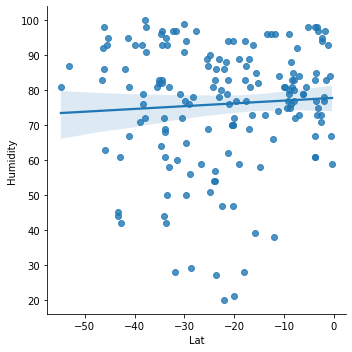

In [39]:
sns.lmplot(x="Lat",y="Humidity", data=southern_hemi_df, fit_reg=True)
linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

LinregressResult(slope=0.5015341767473773, intercept=51.95774429112562, rvalue=0.42791433692085645, pvalue=2.4959283674471793e-19, stderr=0.05296577230041066, intercept_stderr=2.2999211334085126)

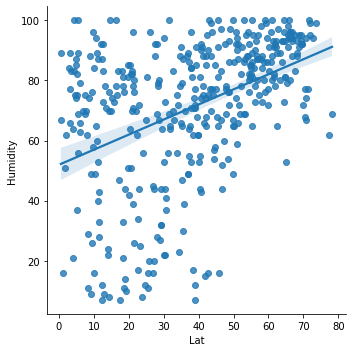

In [40]:
sns.lmplot(x="Lat",y="Humidity", data=northern_hemi_df, fit_reg=True)
linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

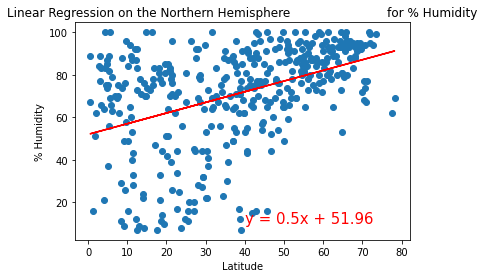

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))


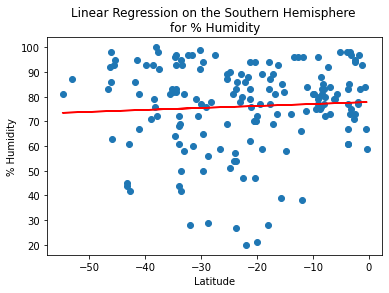

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))


# -------Correlation Between Latitude and Percent Cloudiness-----

LinregressResult(slope=0.6797390676756588, intercept=80.63526079343403, rvalue=0.24603239116581413, pvalue=0.0013058273265574658, stderr=0.20784372168009607, intercept_stderr=5.363462487760081)

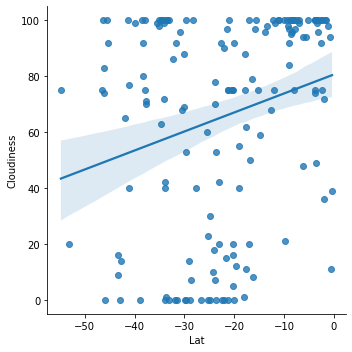

In [48]:
sns.lmplot(x="Lat",y="Cloudiness", data=southern_hemi_df, fit_reg=True)
linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

LinregressResult(slope=0.4395595323192594, intercept=41.01944056078868, rvalue=0.2207869764020421, pvalue=7.886566267464015e-06, stderr=0.09708727239287729, intercept_stderr=4.215799371241039)

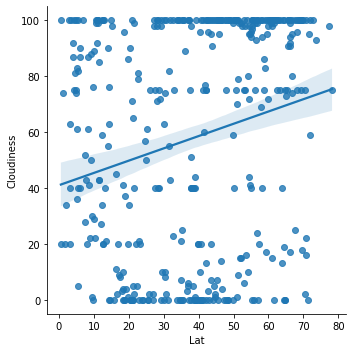

In [51]:
sns.lmplot(x="Lat",y="Cloudiness", data=northern_hemi_df, fit_reg=True)
linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

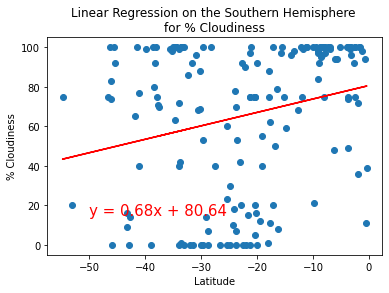

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,15))



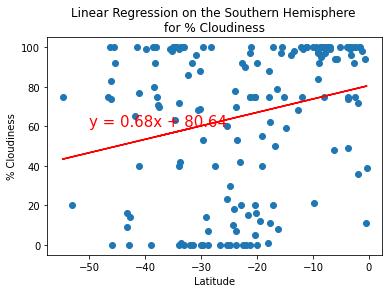

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

# ------Correlation Between Latitude and Wind Speed

LinregressResult(slope=-0.12132254619720134, intercept=4.995996980142042, rvalue=-0.30078516438162306, pvalue=7.443339312776616e-05, stderr=0.029856518567540104, intercept_stderr=0.7704553982082047)

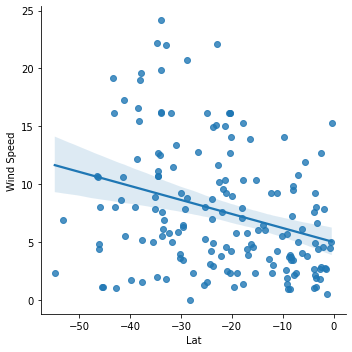

In [63]:
sns.lmplot(x="Lat",y="Wind Speed", data=southern_hemi_df, fit_reg=True)
linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

LinregressResult(slope=0.01437098383282564, intercept=8.375676848435518, rvalue=0.046229000762445314, pvalue=0.35522777642068526, stderr=0.015526638171469381, intercept_stderr=0.6742098096636808)

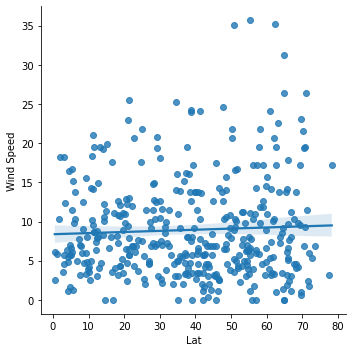

In [64]:
sns.lmplot(x="Lat",y="Wind Speed", data=northern_hemi_df, fit_reg=True)
linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

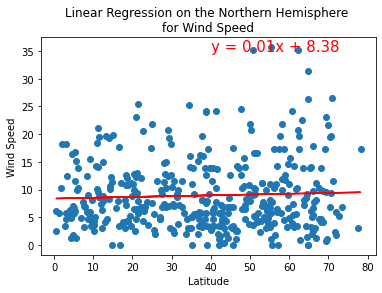

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

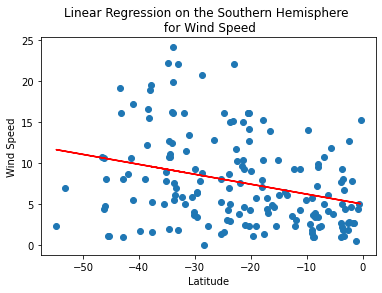

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))